In [30]:
from google.colab import files
uploaded = files.upload()

In [0]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [32]:
ls

iris.csv  sample_data/


In [0]:
names  = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv('./iris.csv',names = names )
#print(df.head(20))


In [0]:
#validation dataset
X = df.iloc[:,0:4]
Y = df.iloc[:,4]
x_train,x_test,y_train,y_test = model_selection.train_test_split(X,Y,test_size = 0.25,random_state = 2)

In [35]:
results  = {}
#different models
kfold = model_selection.KFold(n_splits=10, random_state=10)

log_reg = model_selection.cross_val_score(LogisticRegression(),x_train,y_train,cv=kfold, scoring = 'accuracy')
svm = model_selection.cross_val_score(SVC(),x_train,y_train,cv=kfold, scoring = 'accuracy')
lda = model_selection.cross_val_score(LinearDiscriminantAnalysis(),x_train,y_train,cv=kfold, scoring = 'accuracy')
knn = model_selection.cross_val_score(KNeighborsClassifier(n_neighbors=3),x_train,y_train,cv=kfold, scoring = 'accuracy')
tree = model_selection.cross_val_score(DecisionTreeClassifier(),x_train,y_train,cv=kfold, scoring = 'accuracy')
naive_bayes = model_selection.cross_val_score(GaussianNB(),x_train,y_train,cv=kfold, scoring = 'accuracy')

results['Logistic Regression'] = log_reg.mean()
results['SVM'] = svm.mean()
results['LDA'] = lda.mean()
results['KNN'] = knn.mean()
results['Decison Tree'] = tree.mean()
results['Naive Bayes'] = naive_bayes.mean()



/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


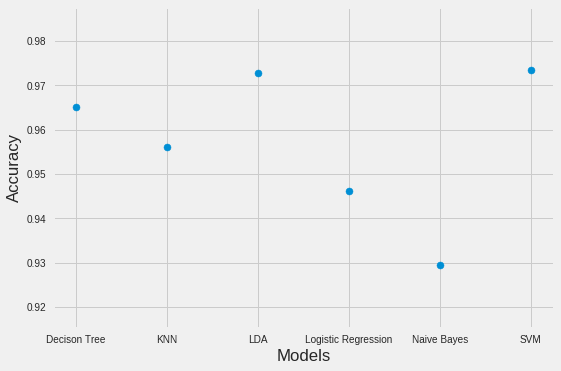

In [36]:
plt.style.use('fivethirtyeight')
plt.scatter(*zip(*sorted(results.items())))
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()


In [37]:
svm = SVC()
svm.fit(x_train,y_train)
predictions = svm.predict(x_test)
pred = svm.predict([[5.1,3.8,1.5,0.3]])
print(pred)
print("Confusion matrix",confusion_matrix(y_test,predictions))
print("Accuracy",accuracy_score(y_test,predictions))

['Iris-setosa']
Confusion matrix [[16  0  0]
 [ 0 10  1]
 [ 0  0 11]]
Accuracy 0.9736842105263158
